In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import seaborn as sbn
from sklearn import preprocessing

In [4]:
veri=pd.read_excel("maliciousornot.xlsx")
print(veri)

     Type  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
0       1   23.303047                  13.445560                 159.066933   
1       1   26.645007                  23.018073                 172.149800   
2       1   25.505113                  27.525833                 168.393333   
3       1   14.792707                  26.398893                 100.491960   
4       1   26.282313                  18.575080                 174.999533   
..    ...         ...                        ...                        ...   
543     1   27.927387                  29.002513                 183.937333   
544     1   26.075060                  36.593167                 169.947733   
545     1   21.502533                  36.372960                 140.284600   
546     1   26.683867                  37.992127                 181.476200   
547     0   10.051787                  31.787480                  62.072373   

     DIST_REMOTE_TCP_PORT  REMOTE_IPS   APP_BYTES  

In [5]:
veri.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [6]:
x=veri.drop("Type",axis=1).values


In [7]:
y=veri["Type"].values

In [8]:
scaler=MinMaxScaler()

In [9]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.35,random_state=15)

In [10]:
x1=scaler.fit_transform(x1)
x1.shape

(356, 30)

In [11]:
x2=scaler.fit_transform(x2)

In [12]:
model=Sequential()
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy")

In [13]:
earlys=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=20)

In [14]:
model.fit(x=x1,y=y1,validation_data=(x2,y2),epochs=700,callbacks=[earlys],verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 10ms/step - loss: 0.7606 - val_loss: 0.6885
Epoch 2/700
12/12 [==============================] - 0s 2ms/step - loss: 0.7225 - val_loss: 0.6891
Epoch 3/700
12/12 [==============================] - 0s 2ms/step - loss: 0.7008 - val_loss: 0.6898
Epoch 4/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6981 - val_loss: 0.6896
Epoch 5/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6953 - val_loss: 0.6891
Epoch 6/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6856 - val_loss: 0.6884
Epoch 7/700
12/12 [==============================] - 0s 2ms/step - loss: 0.7035 - val_loss: 0.6872
Epoch 8/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6957 - val_loss: 0.6850
Epoch 9/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6811 - val_loss: 0.6829
Epoch 10/700
12/12 [==============================] - 0s 2ms/step - loss: 0.6819 - val_loss: 0.6816
Epoch 11

12/12 [==============================] - 0s 2ms/step - loss: 0.3889 - val_loss: 0.3212
Epoch 84/700
12/12 [==============================] - 0s 2ms/step - loss: 0.4158 - val_loss: 0.3168
Epoch 85/700
12/12 [==============================] - 0s 2ms/step - loss: 0.4330 - val_loss: 0.3107
Epoch 86/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3848 - val_loss: 0.3074
Epoch 87/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3798 - val_loss: 0.3050
Epoch 88/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3770 - val_loss: 0.3008
Epoch 89/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3650 - val_loss: 0.2978
Epoch 90/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4081 - val_loss: 0.2963
Epoch 91/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3584 - val_loss: 0.2964
Epoch 92/700
12/12 [==============================] - 0s 2ms/step - loss: 0.3496 - val_loss: 0.2946
Epoch 93/700


In [15]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

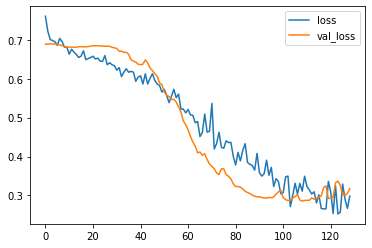

In [16]:
loss.plot()

In [17]:
tahmin=model.predict(x2)
tahmin=pd.DataFrame(tahmin,columns=["Tahmin"])

In [18]:
y2=np.array(y2)
gerceky= pd.DataFrame(y2,columns=["Gerçek Y"])
Sonuc=pd.concat([tahmin,gerceky],axis=1)
Sonuc.columns=["Tahmin","Gerçek Y"]

In [19]:
Sonuc

,Tahmin,Gerçek Y
0,0.096905,0
1,0.999999,1
2,0.096905,0
3,0.999995,1
4,0.096905,0
...,...,...
187,0.096905,0
188,0.845448,1
189,0.096905,0
190,0.096987,0


In [3]:
        Sonuc["tahmin"]=[1 if i>0.5 elif 2 i=0.6 else 0 for i in Sonuc["Tahmin"]]

SyntaxError: invalid syntax (Temp/ipykernel_1300/1804046028.py, line 1)

In [21]:
Sonuc=Sonuc.drop("Tahmin",axis=1)

In [22]:
Sonuc

,Gerçek Y,tahmin
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
187,0,0
188,1,1
189,0,0
190,0,0


In [29]:
from sklearn.metrics import accuracy_score
d=Sonuc.drop("Gerçek Y",axis=1).values
print(f"accuracy: {accuracy_score(y2,d):.2f}")

accuracy: 0.89
